In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%pwd

'/content'

In [ ]:
!unzip -qq "/content/drive/MyDrive/Colab_Notebooks/Addinedu/OX.zip"

In [ ]:
import numpy as np
import pandas as pd
import os
import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import Sequential, models
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os

path = '/content/OX'
print(len(os.listdir(path)))


600


In [ ]:
full_names = os.listdir(path)
full_names

['O.200.jpg',
 'O.219.jpg',
 'O.75.jpg',
 'O.98.jpg',
 'X.503.jpg',
 'O.232.jpg',
 'X.708.jpg',
 'X.591.jpg',
 'X.654.jpg',
 'X.588.jpg',
 'X.722.jpg',
 'O.212.jpg',
 'O.236.jpg',
 'O.245.jpg',
 'O.113.jpg',
 'X.603.jpg',
 'X.693.jpg',
 'X.655.jpg',
 'O.34.jpg',
 'X.762.jpg',
 'X.644.jpg',
 'X.647.jpg',
 'X.680.jpg',
 'X.528.jpg',
 'O.249.jpg',
 'O.69.jpg',
 'O.74.jpg',
 'O.147.jpg',
 'O.229.jpg',
 'X.567.jpg',
 'X.634.jpg',
 'X.564.jpg',
 'O.196.jpg',
 'O.197.jpg',
 'X.561.jpg',
 'X.715.jpg',
 'O.225.jpg',
 'X.521.jpg',
 'O.79.jpg',
 'O.293.jpg',
 'X.597.jpg',
 'X.523.jpg',
 'O.240.jpg',
 'X.730.jpg',
 'X.598.jpg',
 'X.671.jpg',
 'X.778.jpg',
 'O.195.jpg',
 'O.73.jpg',
 'O.181.jpg',
 'O.37.jpg',
 'O.272.jpg',
 'X.540.jpg',
 'X.600.jpg',
 'X.797.jpg',
 'O.251.jpg',
 'X.537.jpg',
 'O.84.jpg',
 'X.519.jpg',
 'X.517.jpg',
 'X.553.jpg',
 'O.105.jpg',
 'O.134.jpg',
 'O.263.jpg',
 'X.765.jpg',
 'O.47.jpg',
 'X.760.jpg',
 'X.643.jpg',
 'O.139.jpg',
 'O.48.jpg',
 'X.729.jpg',
 'X.549.jpg',
 'O

In [ ]:
labels = [each.split('.')[0] for each in full_names]
file_id = [each.split('.')[1] for each in full_names]

In [ ]:
print(labels[:5])
print(file_id[:5])

['O', 'O', 'O', 'O', 'X']
['200', '219', '75', '98', '503']


(3086, 2182, 3)


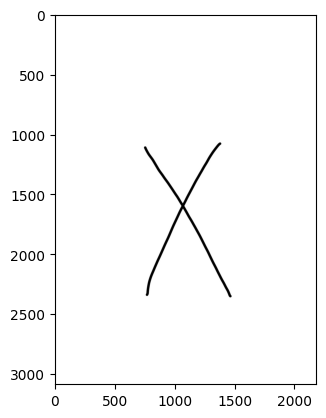

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

sample = random.choice(full_names)
#sample

image = mpimg.imread(path + '/' + sample)
print(image.shape)

plt.imshow(image)
plt.show()

In [ ]:
from tqdm.notebook import tqdm
from skimage.color import rgb2gray
from skimage.transform import resize
import numpy as np

images = []
bar_total = tqdm(full_names)
for file in bar_total:
  image = mpimg.imread(path + '/' + file)
  print(image.shape)
  image = resize(image, (128, 128, 3))
  print(image.shape)
  image = rgb2gray(image)
  print(image.shape)
  images.append(image)
  print('-----------------------')
images = np.array(images)

  0%|          | 0/600 [00:00<?, ?it/s]

(500, 500, 3)
(128, 128, 3)
(128, 128)
-----------------------
(500, 500, 3)
(128, 128, 3)
(128, 128)
-----------------------
(3086, 2182, 3)
(128, 128, 3)
(128, 128)
-----------------------
(3086, 2182, 3)
(128, 128, 3)
(128, 128)
-----------------------
(3086, 2182, 3)
(128, 128, 3)
(128, 128)
-----------------------
(500, 500, 3)
(128, 128, 3)
(128, 128)
-----------------------
(3086, 2182, 3)
(128, 128, 3)
(128, 128)
-----------------------
(3086, 2182, 3)
(128, 128, 3)
(128, 128)
-----------------------
(709, 736, 3)
(128, 128, 3)
(128, 128)
-----------------------
(256, 197, 4)
(128, 128, 3)
(128, 128)
-----------------------
(225, 225, 4)
(128, 128, 3)
(128, 128)
-----------------------
(736, 736, 3)
(128, 128, 3)
(128, 128)
-----------------------
(200, 200, 3)
(128, 128, 3)
(128, 128)
-----------------------
(600, 600, 3)
(128, 128, 3)
(128, 128)
-----------------------
(674, 700, 3)
(128, 128, 3)
(128, 128)
-----------------------
(736, 736, 3)
(128, 128, 3)
(128, 128)
------

In [ ]:
print(images.shape)

(600, 128, 128)


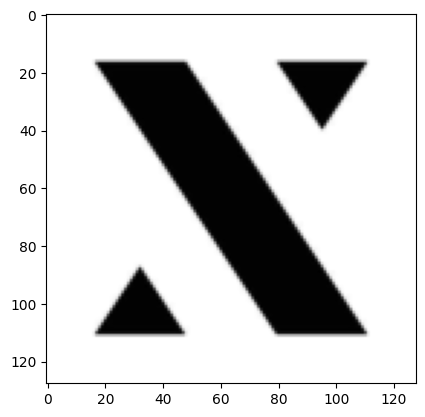

In [ ]:
plt.imshow(images[200], cmap = 'gray')

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(labels)
labels_encoded = encoder.transform(labels)
print(labels[:10])
print(labels_encoded[:10])
print(encoder.classes_)

['O', 'O', 'O', 'O', 'X', 'O', 'X', 'X', 'X', 'X']
[0 0 0 0 1 0 1 1 1 1]
['O' 'X']


In [ ]:
path = '/content/OX'
train_df = pd.DataFrame({'file': os.listdir(path)})

train_df['label'] = labels
train_df['label_encoded'] = labels_encoded

train_df

,file,label,label_encoded
0,O.200.jpg,O,0
1,O.219.jpg,O,0
2,O.75.jpg,O,0
3,O.98.jpg,O,0
4,X.503.jpg,X,1
...,...,...,...
595,X.625.jpg,X,1
596,O.156.jpg,O,0
597,O.153.jpg,O,0
598,O.115.jpg,O,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train_og, X_test_og, y_train_og, y_test_og = train_test_split(images, labels_encoded, test_size = 0.2, random_state = 13,
                                                    stratify = labels_encoded)

X_train = np.copy(X_train_og); X_test = np.copy(X_test_og)
y_train = np.copy(y_train_og); y_test = np.copy(y_test_og)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(480, 128, 128) (120, 128, 128)
(480,) (120,)


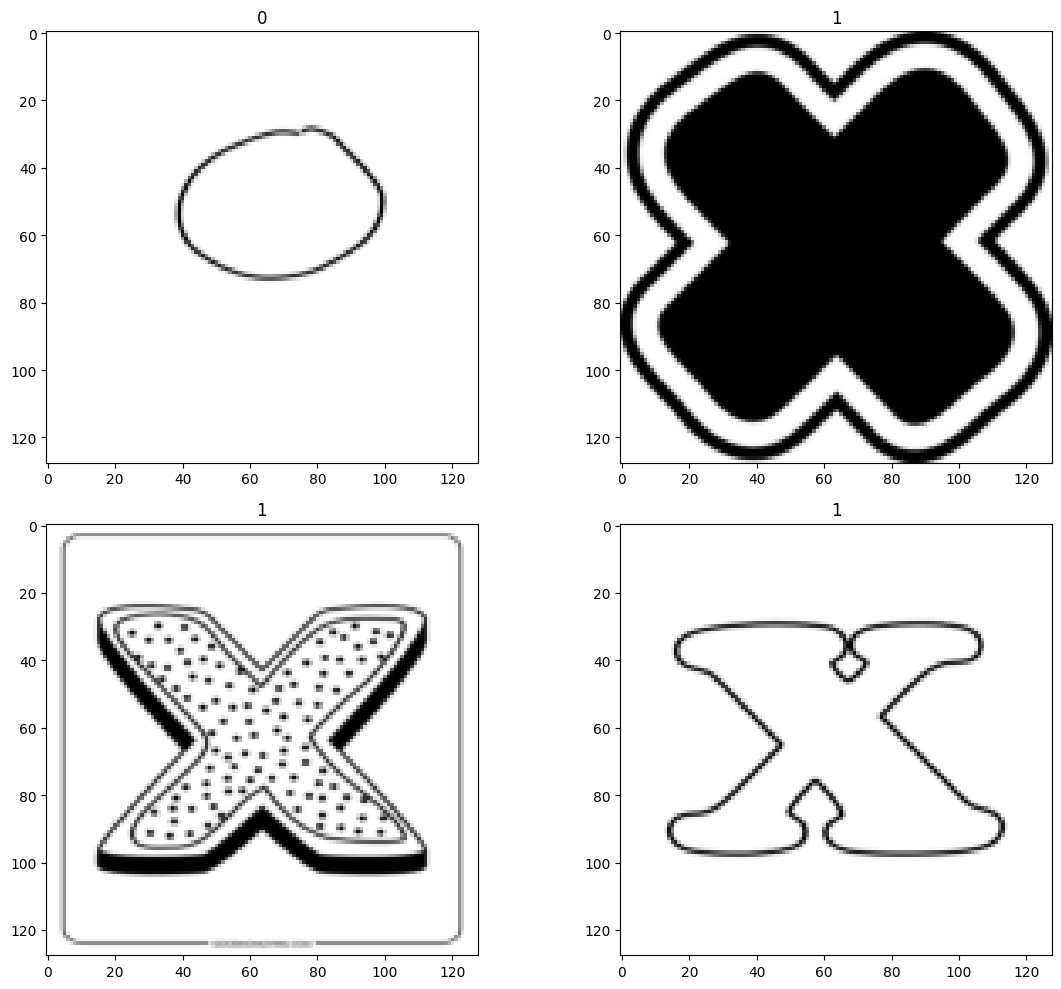

In [ ]:
samples = random.choices(population = range(0, 480), k=4)

plt.figure(figsize=(12,10))
for idx, n in enumerate(samples):
  plt.subplot(2, 2, idx+1)
  plt.imshow(X_train[n], cmap = 'gray', interpolation = 'nearest')
  plt.title(y_train[n])

plt.tight_layout()

In [ ]:
from tensorflow.keras import layers, models

def get_model(img_size):
  model = models.Sequential([
      layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (img_size, img_size, 1)),
      layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
      layers.Dropout(0.25),

      layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
      layers.MaxPooling2D(pool_size = (2,2)),
      layers.Dropout(0.25),

      layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
      layers.MaxPooling2D(pool_size = (2,2)),
      layers.Dropout(0.25),

      layers.Flatten(),
      layers.Dense(512, activation = 'relu'),
      layers.Dropout(0.25),
      layers.Dense(2, activation = 'softmax')
    ])

  model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

  return model

In [ ]:
model = get_model(64)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 15, 15, 64)        0

In [ ]:
print(X_train.shape, y_train.shape)


(480, 128, 128) (480,)


### 콜백 ReduceLROnPlateau

In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor = 'val_loss',
    patience = 2,
    verbose = 1,
    factor = 0.5,
    min_lr = 0.000000001
)

### Early Stopping 콜백 함수

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_accuracy',
    patience = 5,
    verbose = 1,
    mode = 'max',
)

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    monitor = 'val_accuracy',
    filepath = 'ox_CNN_.{epoch:02d}-{val_accuracy:.6f}.hdf5',
    verbose = 1,
    save_best_only = True,
    save_weights_only = True
)

In [ ]:
import time
import numpy as np
import tensorflow as tf

# 초기 설정
img_sizes = [128, 64, 32, 28]
epochs_list = [10, 20]
best_val_accuracy = -np.inf
best_val_loss = np.inf
best_combination = {}

# 모델 학습 및 결과 저장
for img_size in img_sizes:
    for epochs in epochs_list:
        # 데이터 준비
        X_train = resize(X_train, (480, img_size, img_size, 1))
        X_test = resize(X_test, (120, img_size, img_size, 1))
        print(X_train.shape, X_test.shape)
        print('***********************************************')

        print(f'Training model with img_size={img_size}, epochs={epochs}')
        start_time = time.time()

        # 모델 초기화 및 학습
        model = get_model(img_size)
        hist = model.fit(X_train, y_train, epochs=epochs, verbose=2,
                         validation_data=(X_test, y_test),
                         callbacks=[reduce_lr, early_stopping])
        print('Fit time: ', time.time() - start_time)
        print('---------------------------------------')

        # 최대 val_accuracy와 최소 val_loss 갱신
        max_val_acc = max(hist.history['val_accuracy'])
        min_val_loss = min(hist.history['val_loss'])

        if max_val_acc > best_val_accuracy:
            best_val_accuracy = max_val_acc
            best_combination['accuracy'] = (img_size, epochs)
            # 최고 성능을 낸 모델 저장
            model.save_weights(f'best_acc_ox_CNN_{img_size}x{img_size}_{epochs}epochs.h5')

        if min_val_loss < best_val_loss:
            best_val_loss = min_val_loss
            best_combination['loss'] = (img_size, epochs)
            # 최저 손실을 낸 모델 저장
            model.save_weights(f'best_loss_ox_CNN_{img_size}x{img_size}_{epochs}epochs.h5')


(480, 128, 128, 1) (120, 128, 128, 1)
***********************************************
Training model with img_size=128, epochs=10
Epoch 1/10
15/15 - 7s - loss: 1.2587 - accuracy: 0.4708 - val_loss: 0.6934 - val_accuracy: 0.5000 - lr: 0.0010 - 7s/epoch - 497ms/step
Epoch 2/10
15/15 - 0s - loss: 0.6877 - accuracy: 0.5688 - val_loss: 0.6740 - val_accuracy: 0.7000 - lr: 0.0010 - 330ms/epoch - 22ms/step
Epoch 3/10
15/15 - 0s - loss: 0.5915 - accuracy: 0.6938 - val_loss: 0.4734 - val_accuracy: 0.9583 - lr: 0.0010 - 332ms/epoch - 22ms/step
Epoch 4/10
15/15 - 0s - loss: 0.3419 - accuracy: 0.8729 - val_loss: 0.2569 - val_accuracy: 0.9833 - lr: 0.0010 - 368ms/epoch - 25ms/step
Epoch 5/10
15/15 - 0s - loss: 0.1644 - accuracy: 0.9417 - val_loss: 0.0687 - val_accuracy: 0.9833 - lr: 0.0010 - 372ms/epoch - 25ms/step
Epoch 6/10
15/15 - 0s - loss: 0.0997 - accuracy: 0.9667 - val_loss: 0.0466 - val_accuracy: 0.9917 - lr: 0.0010 - 372ms/epoch - 25ms/step
Epoch 7/10
15/15 - 0s - loss: 0.0713 - accuracy: 0

In [ ]:
best_val_accuracy, best_val_loss

(0.9916666746139526, 0.028095992282032967)

In [ ]:
best_combination

{'accuracy': (128, 10), 'loss': (32, 20)}

In [ ]:
# 최적의 조합 출력
print(f"Best img_size and epochs for maximum val_accuracy: {best_combination['accuracy']}")
print(f"Best img_size and epochs for minimum val_loss: {best_combination['loss']}")

Best img_size and epochs for maximum val_accuracy: (128, 10)
Best img_size and epochs for minimum val_loss: (32, 20)


In [ ]:
# 목표로 하는 메트릭 리스트
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

# val_accuracy의 최대값 및 val을 찾고, 해당 인덱스를 저장
max_val_accuracy_index = hist.history['val_accuracy'].index(max(hist.history['val_accuracy']))

# 최대 val_accuracy가 발생한 에포크에서 모든 메트릭을 출력
for metric in plot_target:
    print(metric + ': ' + str(hist.history[metric][max_val_accuracy_index]))

loss: 0.2237362563610077
val_loss: 0.09314008057117462
accuracy: 0.9291666746139526
val_accuracy: 0.9916666746139526


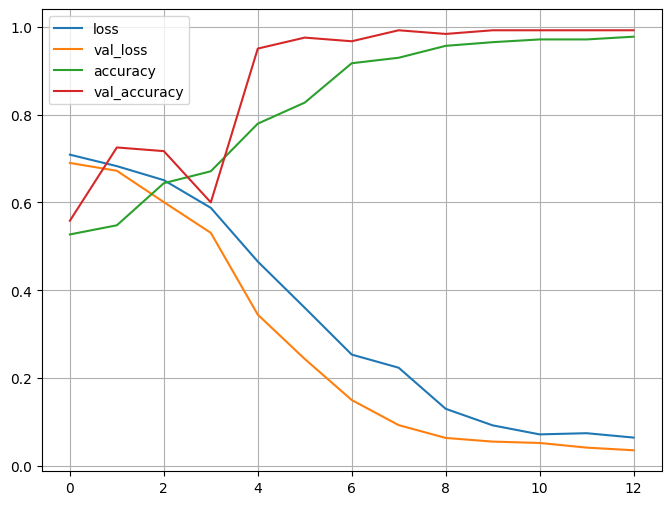

In [ ]:
plt.figure(figsize=(8,6))

for each in plot_target:
  plt.plot(hist.history[each], label = each)

plt.legend()
plt.grid()
plt.show()

In [ ]:
print(X_test.shape)
print(y_test.shape)

(120, 28, 28, 1)
(120,)


In [ ]:
y_test

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [ ]:
prediction = (model.predict(X_test) > 0.5).astype("int32")
print(prediction.shape)

4/4 [==============================] - 0s 3ms/step
(120, 2)


In [ ]:
# 예측 결과에서 각 행의 최대값 인덱스를 추출
y_pred = np.argmax(prediction, axis=1)
print(y_pred.shape)
print(y_pred)

(120,)
[0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0
 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0
 0 1 0 1 0 0 0 1 0]


In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       1.00      0.98      0.99        60

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

[[60  0]
 [ 1 59]]


In [ ]:
wrongs = []

for n in range(len(y_test)):
  if y_pred[n] != y_test[n]:
    wrongs.append(n)

len(wrongs)

1

In [ ]:
wrongs

[106]

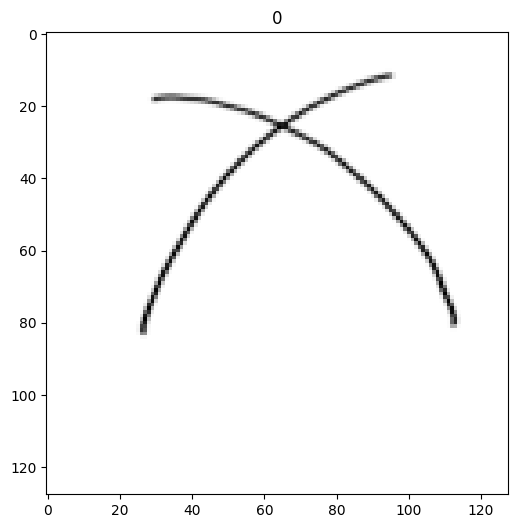

In [ ]:
import random

idx = wrongs[0]

plt.figure(figsize=(8,6))
img = resize(X_test_og[idx], (128, 128))
# print(X_val[n].shape)
# print('-------')
plt.imshow(img, interpolation = 'nearest', cmap = 'gray')
plt.title(y_pred[idx])

plt.show()

### 영상처리 파트
#### Q. **O & X 구분하는 특징이 뭐야?!**
#### A. **Feature Extraction** 하자!!

In [ ]:
train_df.head()

,file,label,label_encoded
0,O.200.jpg,O,0
1,O.219.jpg,O,0
2,O.75.jpg,O,0
3,O.98.jpg,O,0
4,X.503.jpg,X,1


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   file           600 non-null    object
 1   label          600 non-null    object
 2   label_encoded  600 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 14.2+ KB


In [ ]:
# 'label' 열이 'X'인 데이터만 필터링
filtered_df = train_df[train_df['label'] == 'X']

# 'file' 열의 값을 리스트로 추출
X_list = filtered_df['file'].tolist()

print(X_list)
print(len(X_list))

['X.503.jpg', 'X.708.jpg', 'X.591.jpg', 'X.654.jpg', 'X.588.jpg', 'X.722.jpg', 'X.603.jpg', 'X.693.jpg', 'X.655.jpg', 'X.762.jpg', 'X.644.jpg', 'X.647.jpg', 'X.680.jpg', 'X.528.jpg', 'X.567.jpg', 'X.634.jpg', 'X.564.jpg', 'X.561.jpg', 'X.715.jpg', 'X.521.jpg', 'X.597.jpg', 'X.523.jpg', 'X.730.jpg', 'X.598.jpg', 'X.671.jpg', 'X.778.jpg', 'X.540.jpg', 'X.600.jpg', 'X.797.jpg', 'X.537.jpg', 'X.519.jpg', 'X.517.jpg', 'X.553.jpg', 'X.765.jpg', 'X.760.jpg', 'X.643.jpg', 'X.729.jpg', 'X.549.jpg', 'X.638.jpg', 'X.772.jpg', 'X.786.jpg', 'X.728.jpg', 'X.775.jpg', 'X.533.jpg', 'X.679.jpg', 'X.534.jpg', 'X.631.jpg', 'X.560.jpg', 'X.601.jpg', 'X.745.jpg', 'X.686.jpg', 'X.744.jpg', 'X.613.jpg', 'X.731.jpg', 'X.706.jpg', 'X.511.jpg', 'X.777.jpg', 'X.770.jpg', 'X.630.jpg', 'X.559.jpg', 'X.658.jpg', 'X.652.jpg', 'X.782.jpg', 'X.635.jpg', 'X.579.jpg', 'X.717.jpg', 'X.548.jpg', 'X.510.jpg', 'X.741.jpg', 'X.605.jpg', 'X.697.jpg', 'X.733.jpg', 'X.542.jpg', 'X.621.jpg', 'X.711.jpg', 'X.550.jpg', 'X.776.jpg'

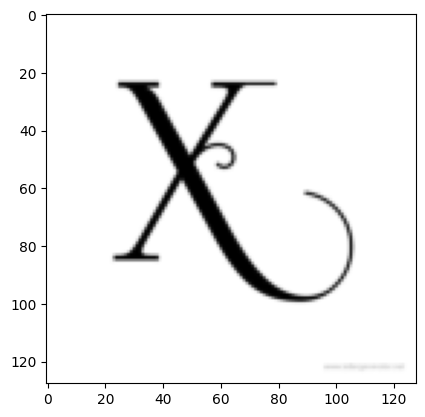

In [ ]:
#print(path + '/' + X_list[91])
img = mpimg.imread(path  + '/' + X_list[91])
img = resize(img, (128, 128, 3))
img = rgb2gray(img)
plt.imshow(img, cmap = 'gray')

In [ ]:
import cv2

# 0 ~ 255 범위로 정규화 및 데이터 타입 변환
original_image = np.copy(img)
original_image_unit8 = cv2.normalize(original_image, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

# SIFT 디스크립터 생성
sift = cv2.xfeatures2d.SIFT_create()

##  original_image에서 키포인트와 디스크립터를 추출
##  original_keypoints = 추출된 키포인트 저장
##  original_descriptors =  추출된 디스크립터가 저장
original_keypoints_sift, original_descriptors_sift = sift.detectAndCompute(original_image_unit8, None)

In [ ]:
#  검출된 키포인트의 개수
print("Number of keypoints: ", len(original_keypoints_sift))  #  270
print('descriptor:', original_descriptors_sift.shape)         # (270, 128) > 총 270개의 키포인트마다 128차원의 디스크립터를 가지고 있음
#print(original_descriptors)                                  # 각 키포인트의 주변 영역에서 추출된 특징을 나타내는 숫자 배열 > 일부만 표현
print(len(original_descriptors_sift[0]))                      # 128

Number of keypoints:  21
descriptor: (21, 128)
128


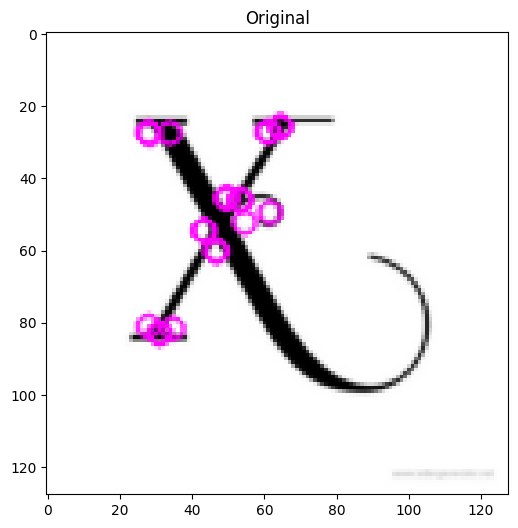

In [ ]:
plt.figure(figsize=(8, 6))
# Draw keypoints on the original image
original_keypoints_image = cv2.drawKeypoints(original_image_unit8, original_keypoints_sift, None, (255, 0, 255))

# Plot the images side by side
plt.title('Original')
plt.imshow(original_keypoints_image)

In [ ]:
import cv2

# SIFT 디스크립터 생성
sift = cv2.xfeatures2d.SIFT_create()

# 특징점 수와 이미지 경로를 저장할 리스트
x_features_count = []
x_descriptors_count = []

for file in X_list:
  img_path = path + '/' + file
  image = mpimg.imread(img_path)
  image = resize(image, (128, 128, 3))
  image = rgb2gray(image)
  if image is not None:
      # 0 ~ 255 범위로 정규화 및 데이터 타입 변환
      image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
      keypoints, descriptors = sift.detectAndCompute(image, None)

      x_features_count.append((len(keypoints), img_path, keypoints, image))
      x_descriptors_count.append(descriptors)
  else:
      print(f"Failed to load image {file}")

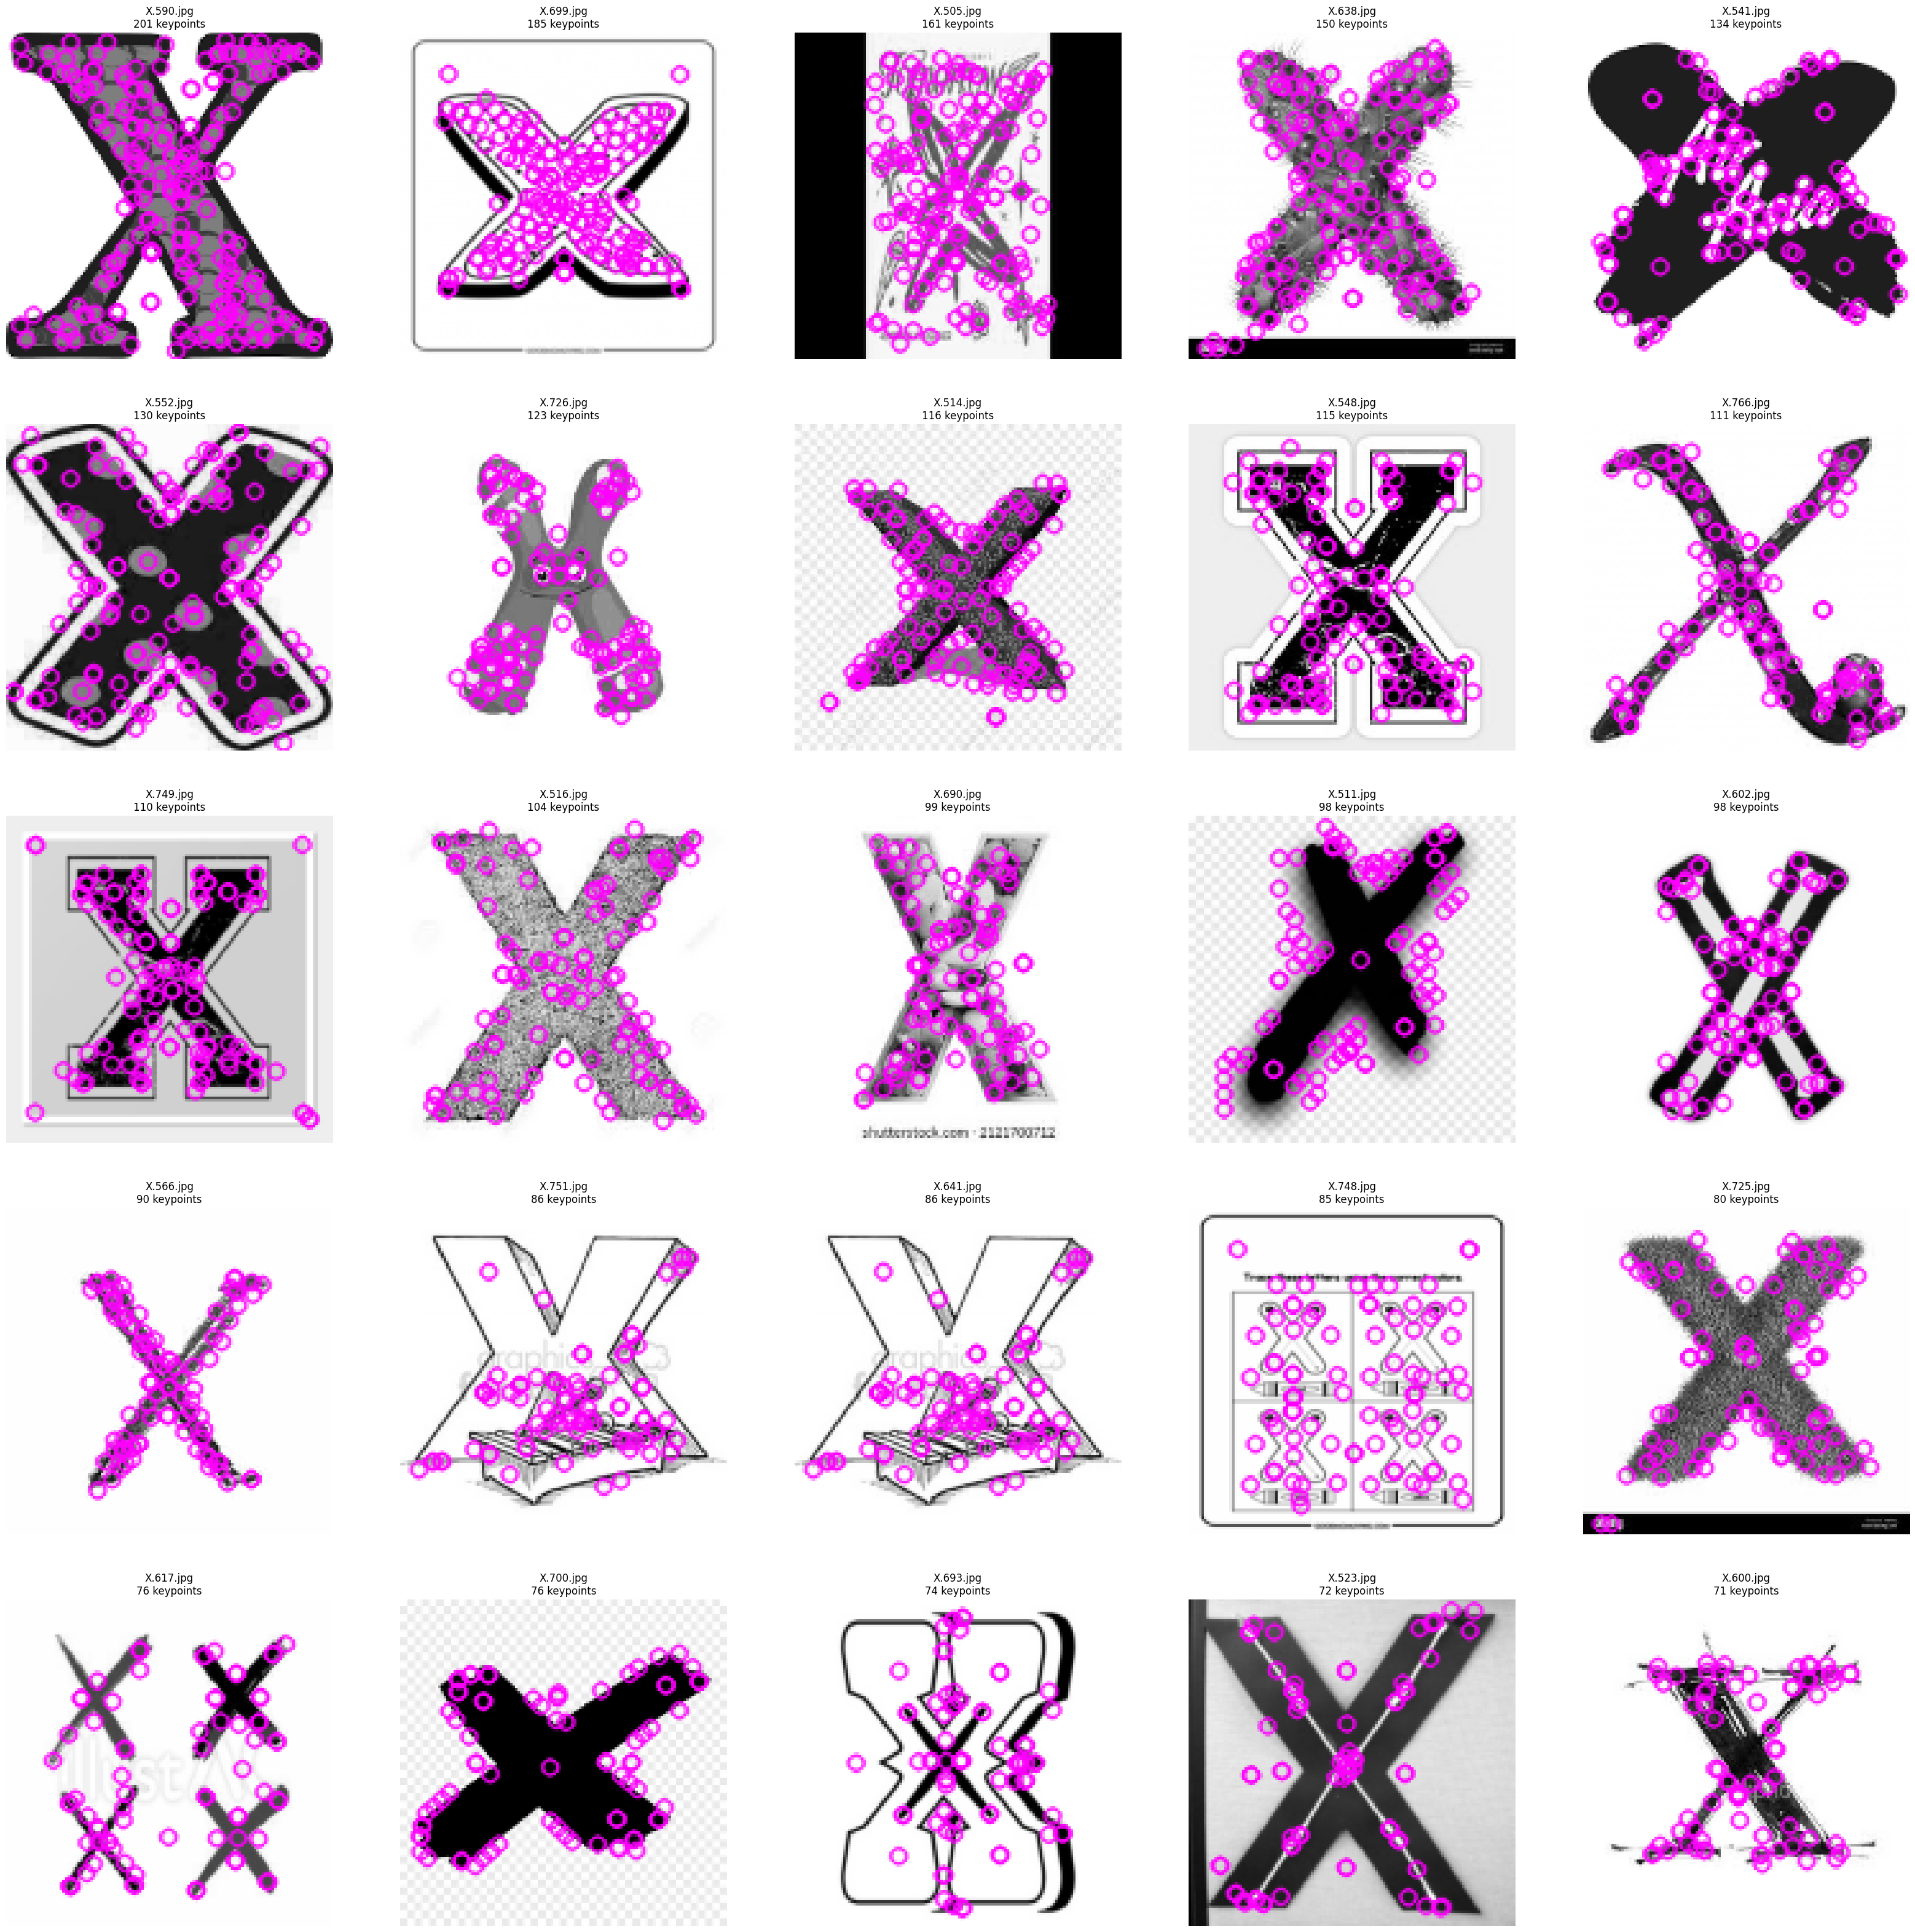

In [ ]:
# 특징점의 수로 내림차순 정렬 후 상위 25개 추출
x_features_count.sort(reverse=True, key=lambda x: x[0])
top_images = x_features_count[:25]

# 상위 25개 이미지 시각화
fig, axs = plt.subplots(5, 5, figsize=(40, 40))
for i, data in enumerate(top_images):
    count, img_path, keypoints, img = data
    keypoints_image = cv2.drawKeypoints(img, keypoints, None, (255, 0, 255))

    ax = axs[i // 5, i % 5]
    ax.imshow(keypoints_image, cmap='gray')
    ax.set_title(f"{img_path.split('/')[-1]}\n{count} keypoints")
    ax.axis('off')
plt.show()

In [ ]:
len(x_features_count)
len(x_descriptors_count)

300

In [ ]:
# 'label' 열이 'O'인 데이터만 필터링
filtered_df = train_df[train_df['label'] == 'O']

# 'file' 열의 값을 리스트로 추출
O_list = filtered_df['file'].tolist()

print(O_list)
print(len(O_list))

['O.200.jpg', 'O.219.jpg', 'O.75.jpg', 'O.98.jpg', 'O.232.jpg', 'O.212.jpg', 'O.236.jpg', 'O.245.jpg', 'O.113.jpg', 'O.34.jpg', 'O.249.jpg', 'O.69.jpg', 'O.74.jpg', 'O.147.jpg', 'O.229.jpg', 'O.196.jpg', 'O.197.jpg', 'O.225.jpg', 'O.79.jpg', 'O.293.jpg', 'O.240.jpg', 'O.195.jpg', 'O.73.jpg', 'O.181.jpg', 'O.37.jpg', 'O.272.jpg', 'O.251.jpg', 'O.84.jpg', 'O.105.jpg', 'O.134.jpg', 'O.263.jpg', 'O.47.jpg', 'O.139.jpg', 'O.48.jpg', 'O.242.jpg', 'O.80.jpg', 'O.267.jpg', 'O.169.jpg', 'O.213.jpg', 'O.142.jpg', 'O.126.jpg', 'O.289.jpg', 'O.168.jpg', 'O.59.jpg', 'O.121.jpg', 'O.127.jpg', 'O.19.jpg', 'O.109.jpg', 'O.27.jpg', 'O.177.jpg', 'O.238.jpg', 'O.189.jpg', 'O.145.jpg', 'O.247.jpg', 'O.111.jpg', 'O.101.jpg', 'O.166.jpg', 'O.288.jpg', 'O.110.jpg', 'O.52.jpg', 'O.269.jpg', 'O.244.jpg', 'O.204.jpg', 'O.06.jpg', 'O.14.jpg', 'O.266.jpg', 'O.49.jpg', 'O.210.jpg', 'O.91.jpg', 'O.24.jpg', 'O.56.jpg', 'O.179.jpg', 'O.280.jpg', 'O.04.jpg', 'O.96.jpg', 'O.62.jpg', 'O.191.jpg', 'O.173.jpg', 'O.108.jpg

In [ ]:
import cv2

# SIFT 디스크립터 생성
sift = cv2.xfeatures2d.SIFT_create()

# 특징점 수와 이미지 경로를 저장할 리스트
o_features_count = []
o_descriptors_count = []

for file in O_list:
  img_path = path + '/' + file
  image = mpimg.imread(img_path)
  image = resize(image, (128, 128, 3))
  image = rgb2gray(image)
  if image is not None:
      # 0 ~ 255 범위로 정규화 및 데이터 타입 변환
      image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
      keypoints, descriptors = sift.detectAndCompute(image, None)

      o_features_count.append((len(keypoints), img_path, keypoints, image))
      o_descriptors_count.append(descriptors)
  else:
      print(f"Failed to load image {file}")

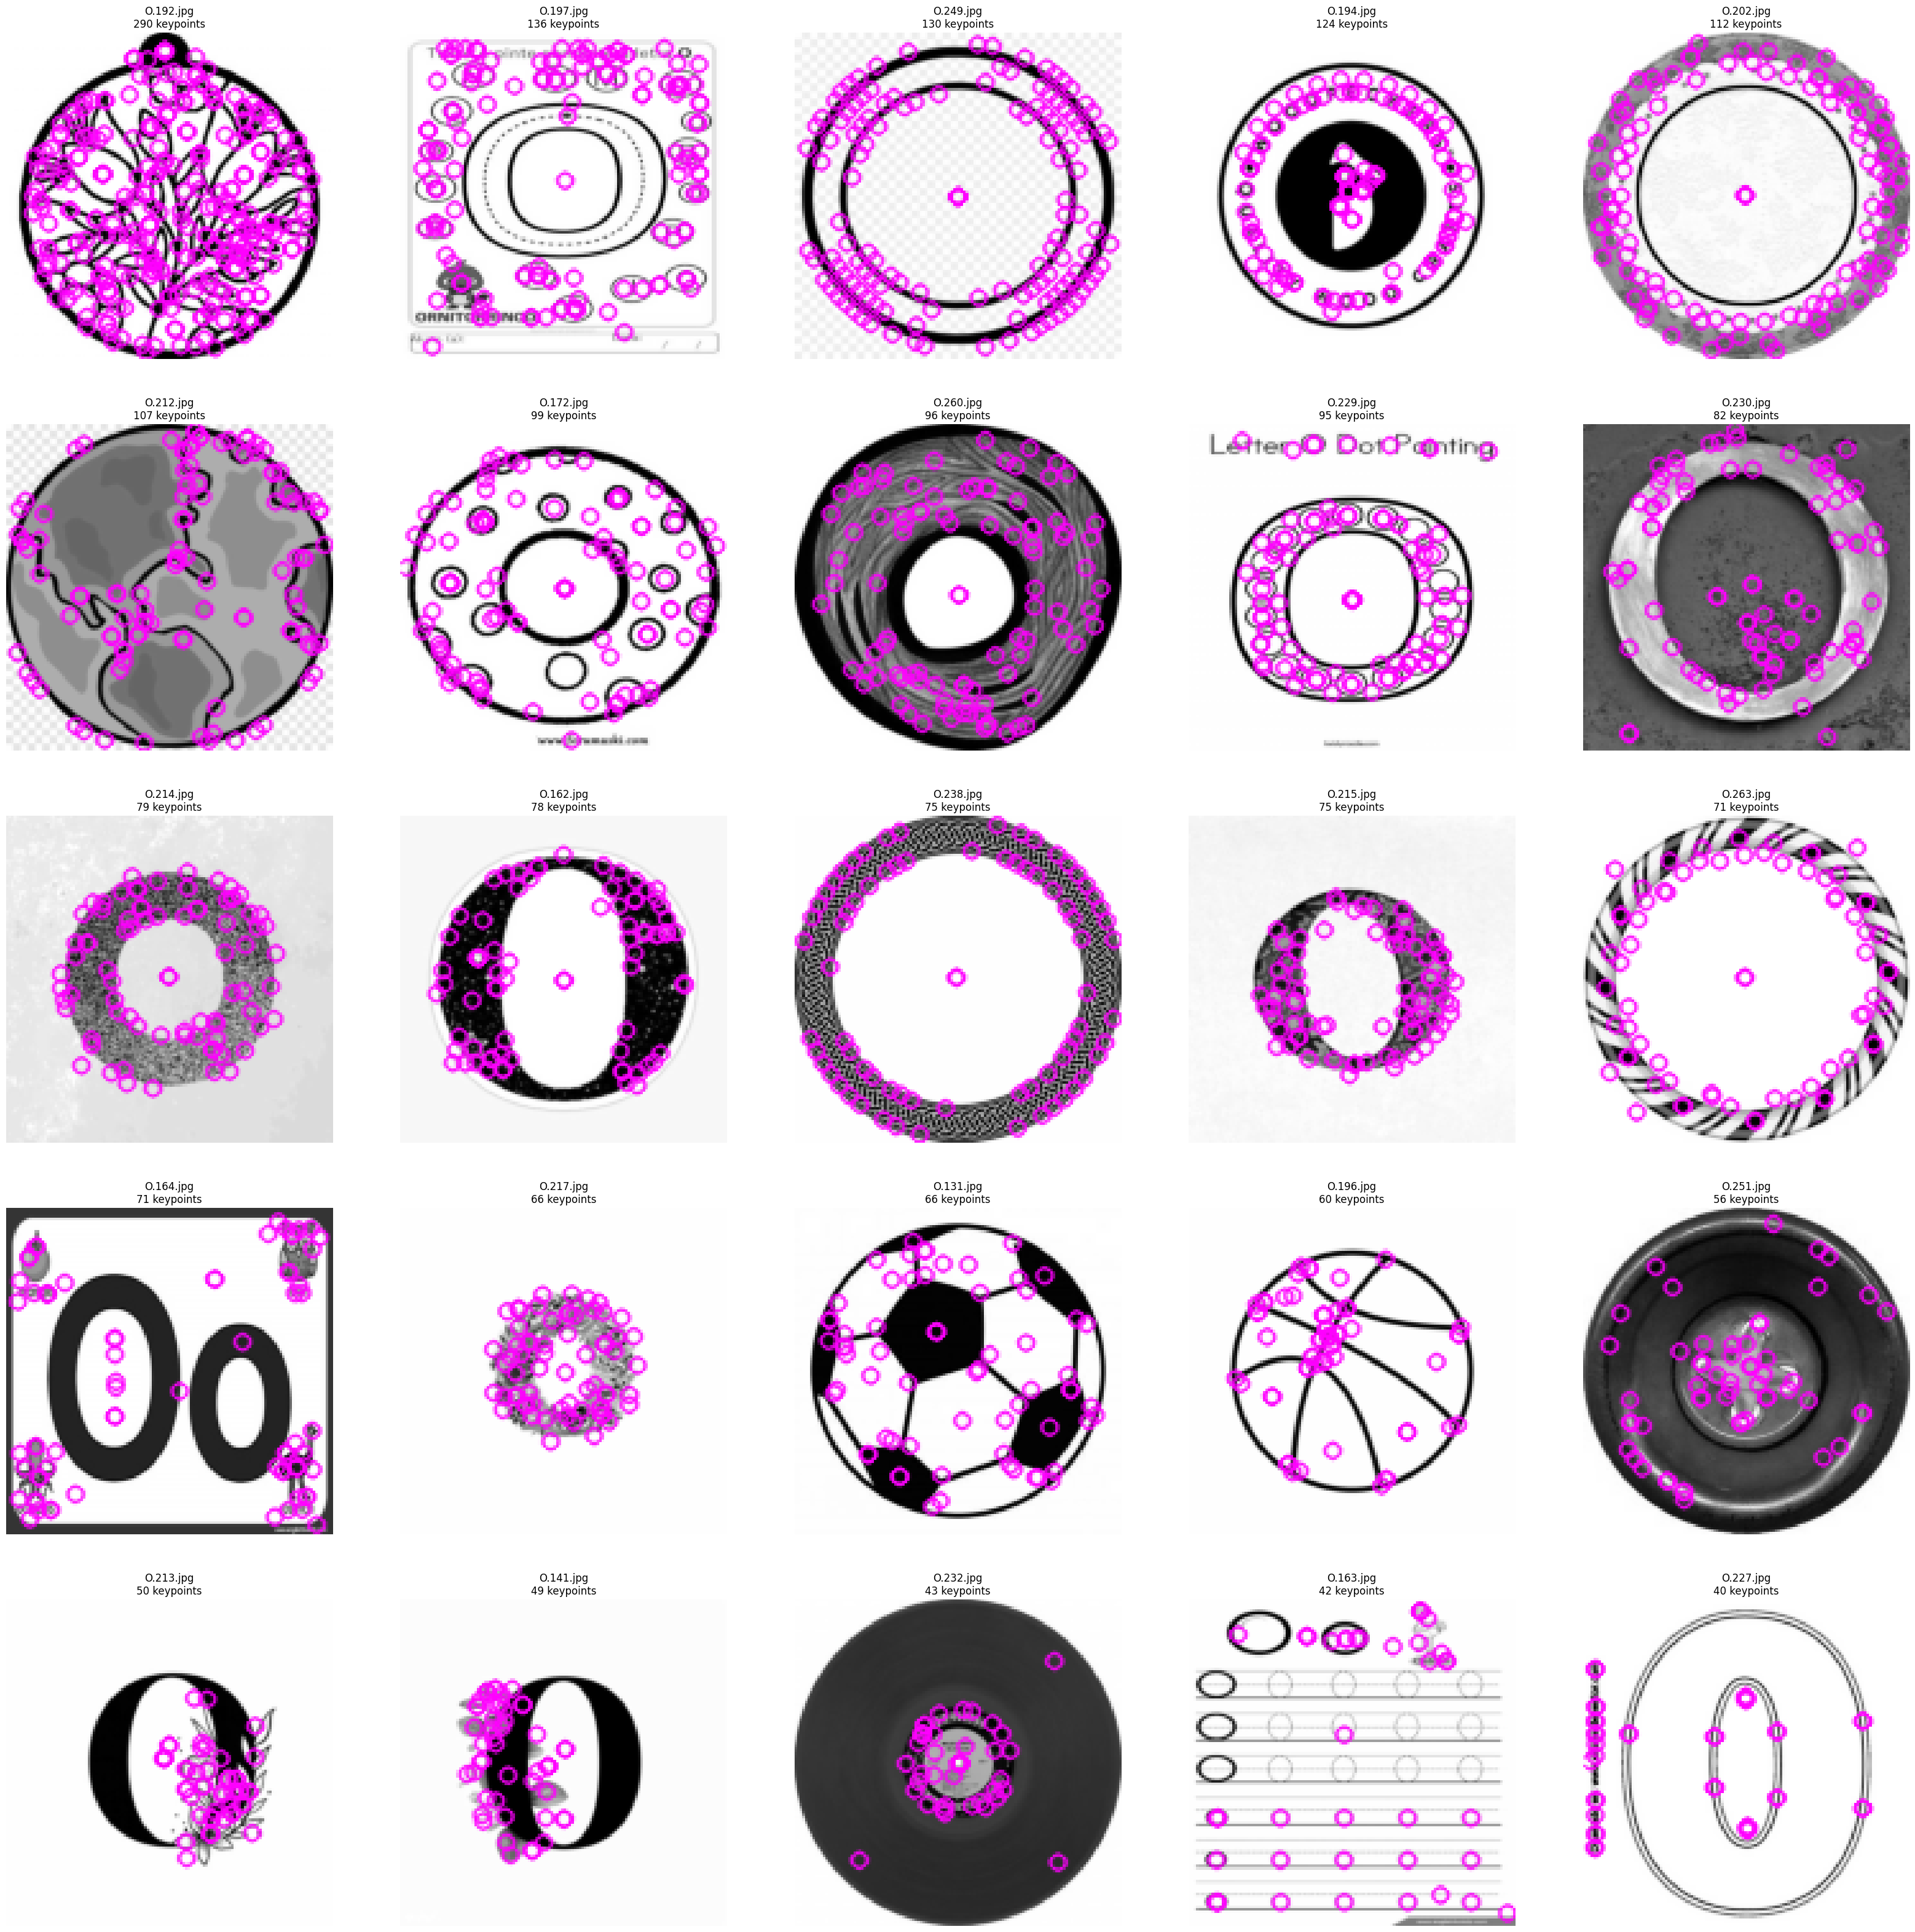

In [ ]:
# 특징점의 수로 내림차순 정렬 후 상위 25개 추출
o_features_count.sort(reverse=True, key=lambda x: x[0])
top_images = o_features_count[:25]

# 상위 25개 이미지 시각화
fig, axs = plt.subplots(5, 5, figsize=(40, 40))
for i, data in enumerate(top_images):
    count, img_path, keypoints, img = data
    keypoints_image = cv2.drawKeypoints(img, keypoints, None, (255, 0, 255))

    ax = axs[i // 5, i % 5]
    ax.imshow(keypoints_image, cmap='gray')
    ax.set_title(f"{img_path.split('/')[-1]}\n{count} keypoints")
    ax.axis('off')
plt.show()

In [ ]:
len(o_features_count)
len(o_descriptors_count)

300

In [ ]:
o_descriptors_count[0]

array([[ 0.,  0.,  3., ...,  0.,  1., 19.],
       [ 0.,  0.,  1., ...,  0.,  4., 22.],
       [ 0.,  0.,  3., ...,  0.,  3., 33.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  5.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [ ]:
o_labels = [0] * len(o_descriptors_count)
x_labels = [1] * len(o_descriptors_count)

In [ ]:
o_feature_df = pd.DataFrame({'feature': o_descriptors_count,
                             'label': o_labels
                           })

# 결측치 제거
o_feature_df = o_feature_df.dropna()
o_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 0 to 299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   feature  202 non-null    object
 1   label    202 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.7+ KB


In [ ]:
x_feature_df = pd.DataFrame({'feature': x_descriptors_count,
                             'label': x_labels
                           })

# 결측치 제거
x_feature_df = x_feature_df.dropna()
x_feature_df.head()

,feature,label
0,"[[5.0, 9.0, 0.0, 0.0, 57.0, 103.0, 0.0, 0.0, 3...",1
1,"[[1.0, 79.0, 0.0, 0.0, 1.0, 95.0, 0.0, 0.0, 1....",1
2,"[[9.0, 52.0, 0.0, 0.0, 19.0, 105.0, 0.0, 0.0, ...",1
3,"[[0.0, 0.0, 0.0, 0.0, 94.0, 10.0, 0.0, 0.0, 77...",1
4,"[[0.0, 145.0, 52.0, 6.0, 10.0, 19.0, 5.0, 0.0,...",1


In [ ]:
feature_df = pd.concat([o_feature_df, x_feature_df])
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466 entries, 0 to 299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   feature  466 non-null    object
 1   label    466 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 10.9+ KB


In [ ]:
np.array(feature_df['label'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
X_train_ft, X_test_ft, y_train_ft, y_test_ft = train_test_split(np.array(feature_df['feature']), np.array(feature_df['label']),
                                                                test_size = 0.2, random_state = 13,
                                                                stratify = np.array(feature_df['label']))

print(X_train_ft.shape, X_test_ft.shape)
print(y_train_ft.shape, y_test_ft.shape)

(372,) (94,)
(372,) (94,)


In [ ]:
print(X_train_ft[0].shape)
print(X_train_ft[-1].shape)

(7, 128)
(25, 128)


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 최대 descriptor 길이 찾기
max_length = max([len(x) for x in X_train_ft])
print(max_length)

290


In [ ]:
# Training과 Testing 데이터에 Zero-Padding 적용
X_train_ft = pad_sequences(X_train_ft, maxlen=max_length, padding='post', dtype='float32')
X_test_ft = pad_sequences(X_test_ft, maxlen=max_length, padding='post', dtype='float32')

print(X_train_ft.shape, X_test_ft.shape)

(372, 290, 128) (94, 290, 128)


In [ ]:
# CNN 입력을 위한 reshape
X_train_ft_reshaped = X_train_ft.reshape(X_train_ft.shape[0], X_train_ft.shape[1], X_train_ft.shape[2], 1)
X_test_ft_reshaped = X_test_ft.reshape(X_test_ft.shape[0], X_test_ft.shape[1], X_test_ft.shape[2], 1)

print("Reshaped Training Data: ", X_train_ft_reshaped.shape)
print("Reshaped Test Data: ", X_test_ft_reshaped.shape)

Reshaped Training Data:  (372, 290, 128, 1)
Reshaped Test Data:  (94, 290, 128, 1)


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation = 'relu', padding = 'same', input_shape=(max_length, 128, 1)),
    layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation = 'relu'),
    layers.Dropout(0.25),
    layers.Dense(2, activation = 'softmax')
  ])

model.summary()
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 290, 128, 32)      320       
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 145, 64, 32)       0         
 ng2D)                                                           
                                                                 
 dropout_51 (Dropout)        (None, 145, 64, 32)       0         
                                                                 
 conv2d_44 (Conv2D)          (None, 145, 64, 64)       18496     
                                                                 
 max_pooling2d_44 (MaxPooli  (None, 72, 32, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_52 (Dropout)        (None, 72, 32, 64)      

In [ ]:
import time

start_time = time.time()
epochs = 20

hist = model.fit(X_train_ft_reshaped, y_train_ft, epochs = epochs, verbose = 2,
                 validation_data = (X_test_ft, y_test_ft),
                )

print('fit time: ', time.time() - start_time)

Epoch 1/20
12/12 - 8s - loss: 9.8460 - accuracy: 0.5753 - val_loss: 0.6915 - val_accuracy: 0.5957 - 8s/epoch - 647ms/step
Epoch 2/20
12/12 - 1s - loss: 0.7192 - accuracy: 0.6398 - val_loss: 0.6321 - val_accuracy: 0.6702 - 648ms/epoch - 54ms/step
Epoch 3/20
12/12 - 1s - loss: 0.5549 - accuracy: 0.7258 - val_loss: 0.5704 - val_accuracy: 0.7447 - 643ms/epoch - 54ms/step
Epoch 4/20
12/12 - 1s - loss: 0.5252 - accuracy: 0.7661 - val_loss: 0.5574 - val_accuracy: 0.7872 - 676ms/epoch - 56ms/step
Epoch 5/20
12/12 - 1s - loss: 0.4864 - accuracy: 0.7796 - val_loss: 0.5410 - val_accuracy: 0.8085 - 673ms/epoch - 56ms/step
Epoch 6/20
12/12 - 1s - loss: 0.4527 - accuracy: 0.8253 - val_loss: 0.4873 - val_accuracy: 0.8298 - 672ms/epoch - 56ms/step
Epoch 7/20
12/12 - 1s - loss: 0.4398 - accuracy: 0.8118 - val_loss: 0.4675 - val_accuracy: 0.8191 - 695ms/epoch - 58ms/step
Epoch 8/20
12/12 - 1s - loss: 0.3935 - accuracy: 0.8495 - val_loss: 0.4296 - val_accuracy: 0.8191 - 695ms/epoch - 58ms/step
Epoch 9/20

In [ ]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

for each in plot_target:
  print(each + ': ' + str(hist.history[each][-1]))

loss: 0.17686210572719574
val_loss: 0.442608118057251
accuracy: 0.9327957034111023
val_accuracy: 0.8723404407501221


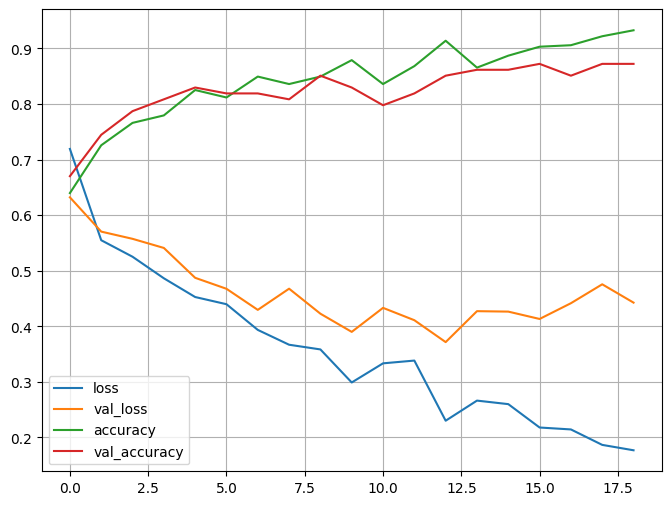

In [ ]:
plt.figure(figsize=(8,6))

for each in plot_target:
  plt.plot(hist.history[each][1:], label = each)

plt.legend()
plt.grid()
plt.show()